In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [9]:
revised_data_us_zips=pd.read_csv("/Users/shawnho/Downloads/ECON445-project-main/revised_data_us_zips.csv")
revised_loopnet_data_ca = pd.read_csv("/Users/shawnho/Downloads/ECON445-project-main/revised_loopnet_data_ca.csv")

merged = pd.merge(left = revised_loopnet_data_ca, right = revised_data_us_zips, left_on = "zip" ,
                   right_on ="zip", how = "outer")
merged

,id_x,zip,address,price_usd,size_sf,no_stories,property_type,year_built,year_renovated,parking_ratio,...,gross_rent_multiplier,id_y,city,state_id,state_name,density,county_name,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,1.0,90066,"4077 McLaughlin Ave, Los Angeles, CA 90066 - M...",3895000,8156,2,Multifamily,1964,\N,1.72,...,14.35,30059,Los Angeles,CA,California,4642,Los Angeles,NaN,NaN,NaN
1,14.0,90066,"3451 Beethoven St, Los Angeles, CA 90066 - Mul...",2000000,2700,2,Multifamily,1961,\N,1.11,...,18,30059,Los Angeles,CA,California,4642,Los Angeles,NaN,NaN,NaN
2,67.0,90066,"3814 Lyceum Ave, Los Angeles, CA 90066 - Multi...",1395000,1624,1,Multifamily,1953,\N,\N,...,\N,30059,Los Angeles,CA,California,4642,Los Angeles,NaN,NaN,NaN
3,74.0,90066,"4417 Campbell Dr, Los Angeles, CA 90066 - Mult...",2350000,3646,2,Multifamily,1928,1990,1.1,...,13.46,30059,Los Angeles,CA,California,4642,Los Angeles,NaN,NaN,NaN
4,161.0,90066,"3611 S Centinela Ave, Los Angeles, CA 90066 - ...",4150000,7266,2,Multifamily,1988,\N,2.2,...,16.2,30059,Los Angeles,CA,California,4642,Los Angeles,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11904,NaN,99923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,33117,Hyder,AK,Alaska,0.3,Prince of Wales-Hyder,NaN,NaN,NaN
11905,NaN,99925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,33118,Klawock,AK,Alaska,6.3,Prince of Wales-Hyder,NaN,NaN,NaN
11906,NaN,99926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,33119,Metlakatla,AK,Alaska,4.8,Prince of Wales-Hyder,NaN,NaN,NaN
11907,NaN,99927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,33120,Point Baker,AK,Alaska,0,Prince of Wales-Hyder,NaN,NaN,NaN


In [10]:
merged=merged.replace(to_replace="\\N",value=np.nan)
merged.replace([np.inf, -np.inf], np.nan, inplace = True)
merged.drop(["Unnamed: 7","Unnamed: 8","Unnamed: 9","year_renovated"],
        axis=1,inplace=True)
merged.dropna(inplace = True)

merged

,id_x,zip,address,price_usd,size_sf,no_stories,property_type,year_built,parking_ratio,no_units,lot_size_ac,building_class,cap_rate,gross_rent_multiplier,id_y,city,state_id,state_name,density,county_name
0,1.0,90066,"4077 McLaughlin Ave, Los Angeles, CA 90066 - M...",3895000,8156,2,Multifamily,1964,1.72,10,0.16,B,4.88,14.35,30059,Los Angeles,CA,California,4642,Los Angeles
4,161.0,90066,"3611 S Centinela Ave, Los Angeles, CA 90066 - ...",4150000,7266,2,Multifamily,1988,2.2,9,0.15,B,3.98,16.2,30059,Los Angeles,CA,California,4642,Los Angeles
15,927.0,90066,"12747 Mitchell Ave, Los Angeles, CA 90066 - Mu...",2195000,3062,1,Multifamily,1962,1.96,5,0.16,C,3,22.88,30059,Los Angeles,CA,California,4642,Los Angeles
54,166435.0,90066,"4320 S Centinela Ave, Los Angeles, CA 90066 - ...",7995000,21268,3,Multifamily,1990,0.71,15,0.24,B,3.45,16.92,30059,Los Angeles,CA,California,4642,Los Angeles
58,168418.0,90066,"11411 Washington Pl, Los Angeles, CA 90066 - M...",1600000,3000,2,Multifamily,1952,1.33,4,0.11,C,3.26,18.28,30059,Los Angeles,CA,California,4642,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8625,166269.0,91501,"550 E Providencia Ave, Burbank, CA 91501 - Mul...",2300000,5768,2,Multifamily,1977,0.87,5,0.16,C,3.53,18.8,30250,Burbank,CA,California,1996.1,Los Angeles
8626,166270.0,91501,"603 S 6th St, Burbank, CA 91501 - FULLY RENOVA...",999000,2026,1,Multifamily,1948,1.48,2,0.16,C,4.52,16.17,30250,Burbank,CA,California,1996.1,Los Angeles
8893,164355.0,90270,"5418 Gifford Ave, Maywood, CA 90270 - Multifam...",795000,1728,1,Multifamily,1936,3.47,3,0.14,C,5.75,13.52,30095,Maywood,CA,California,8350.2,Los Angeles
8905,175530.0,90240,"7348-7350 Florence Avenue, Downey, CA 90240 - ...",5500000,15576,2,Multifamily,1960,2.57,20,0.94,C,4.08,14.5,30080,Downey,CA,California,3464.1,Los Angeles


In [4]:
merged.isnull().values.any()

False

In [11]:
merged.isnull().sum()

id_x                     0
zip                      0
address                  0
price_usd                0
size_sf                  0
no_stories               0
property_type            0
year_built               0
parking_ratio            0
no_units                 0
lot_size_ac              0
building_class           0
cap_rate                 0
gross_rent_multiplier    0
id_y                     0
city                     0
state_id                 0
state_name               0
density                  0
county_name              0
dtype: int64

In [12]:
merged.describe()

,id_x,zip,id_y
count,692.000000,692.000000,692.000000
mean,71350.650289,90484.621387,30104.949422
std,80625.244759,562.745146,84.386706
min,1.000000,90002.000000,30004.000000
25%,441.250000,90032.000000,30032.000000
50%,2554.500000,90243.000000,30082.000000
75%,166269.250000,90813.000000,30169.000000
max,178715.000000,91803.000000,30309.000000


In [13]:
df=merged.copy()

In [14]:
df.iloc[:,3:6]=df.iloc[:,3:6].astype('float')
df.iloc[:,7:11]=df.iloc[:,7:11].astype('float')
df.iloc[:,12:14]=df.iloc[:,12:14].astype('float')
df.iloc[:,18]=df.iloc[:,18].astype('float')

In [15]:
df.describe()

,id_x,zip,price_usd,size_sf,no_stories,year_built,parking_ratio,no_units,lot_size_ac,cap_rate,gross_rent_multiplier,id_y,density
count,692.000000,692.000000,6.920000e+02,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000
mean,71350.650289,90484.621387,3.788860e+06,9098.115607,2.014451,1956.767341,1.440462,10.530347,0.261431,4.138454,16.122601,30104.949422,5423.452601
std,80625.244759,562.745146,5.013949e+06,11509.605587,0.566625,25.620676,0.652742,10.789551,0.360654,1.013317,3.376005,84.386706,3064.415790
min,1.000000,90002.000000,4.100000e+05,1024.000000,1.000000,1895.000000,0.090000,2.000000,0.050000,1.170000,3.040000,30004.000000,141.500000
25%,441.250000,90032.000000,1.725000e+06,4128.000000,2.000000,1940.000000,1.000000,5.000000,0.150000,3.510000,13.997500,30032.000000,3398.050000
50%,2554.500000,90243.000000,2.712500e+06,6026.500000,2.000000,1958.000000,1.340000,8.000000,0.180000,4.090000,15.595000,30082.000000,5017.300000
75%,166269.250000,90813.000000,4.212500e+06,10172.250000,2.000000,1964.250000,1.750000,12.000000,0.280000,4.640000,17.662500,30169.000000,6682.900000
max,178715.000000,91803.000000,1.060000e+08,209716.000000,6.000000,2021.000000,5.570000,118.000000,7.500000,12.400000,39.320000,30309.000000,21865.000000


## SVM

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = \
train_test_split(df[['size_sf', 'no_stories','year_built','parking_ratio','no_units', 
                     'lot_size_ac','cap_rate', 'gross_rent_multiplier', 'density']], 
                 df[["price_usd"]], test_size=0.3, random_state=0)

In [27]:
from sklearn import svm
model = svm.SVC()
model.fit(x_train, y_train.values.ravel())

SVC()

In [28]:
predictions = model.predict(x_test)

In [72]:
pred = pd.Series(predictions)

In [67]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


              precision    recall  f1-score   support

    595000.0       0.00      0.00      0.00         1
    795000.0       0.00      0.00      0.00         1
    849900.0       0.00      0.00      0.00         1
    875000.0       0.00      0.00      0.00         1
    945000.0       0.00      0.00      0.00         1
    949949.0       0.00      0.00      0.00         1
    950000.0       0.00      0.00      0.00         1
    999000.0       0.00      0.00      0.00         1
   1100000.0       0.00      0.00      0.00         1
   1149000.0       0.00      0.00      0.00         1
   1150000.0       0.00      0.00      0.00         2
   1188000.0       0.00      0.00      0.00         1
   1195000.0       0.00      0.00      0.00         1
   1198000.0       0.00      0.00      0.00         1
   1199000.0       0.00      0.00      0.00         1
   1200000.0 

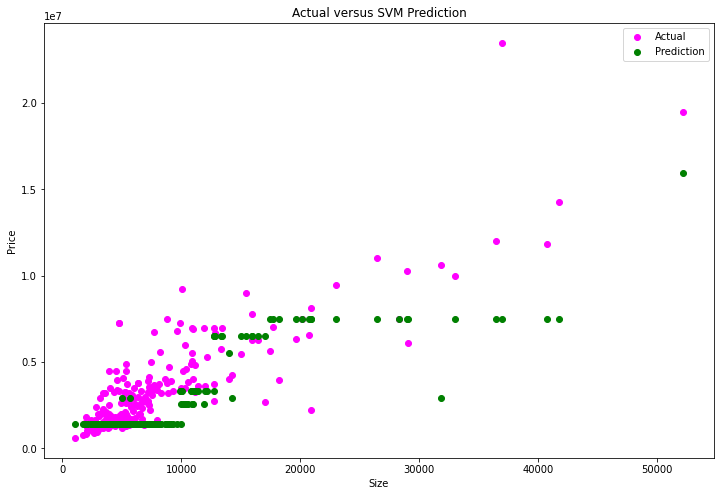

In [65]:
plt.figure(figsize = (12, 8))
plt.scatter(x_test.size_sf, y_test, color = 'magenta', label="Actual")
plt.scatter(x_test.size_sf, predictions, color = 'green', label="Prediction")
plt.legend()
plt.title('Actual versus SVM Prediction')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

In [162]:
df_sub = x_test.copy()
df_sub.size_sf = x_test.size_sf
df_sub["pred"] = pred.tolist()
df_sub = df_sub.sort_values(by= ["size_sf"])

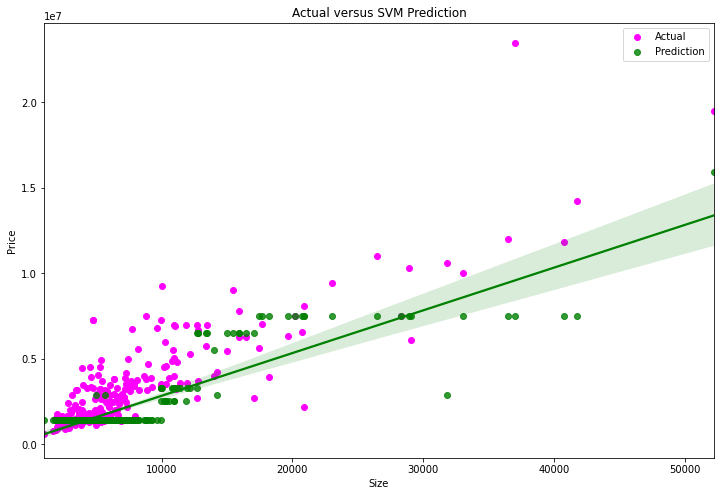

In [163]:
plt.figure(figsize = (12, 8))
plt.scatter(x_test.size_sf, y_test, color = 'magenta', label="Actual")
sns.regplot(df_sub.size_sf, df_sub.pred, color = 'green', label="Prediction")
plt.legend()
plt.title('Actual versus SVM Prediction')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

In [183]:
df2 = df1.copy()
predictions_all = model.predict(df2[['size_sf', 'no_stories','year_built','parking_ratio','no_units', 
                     'lot_size_ac','cap_rate', 'gross_rent_multiplier', 'density']])

df2["pre"] = predictions_all.tolist()
df2["res"] = df2["pre"] - df2["price_usd"]

In [185]:
df2 = df2.sort_values(by=["res"], ascending=True)

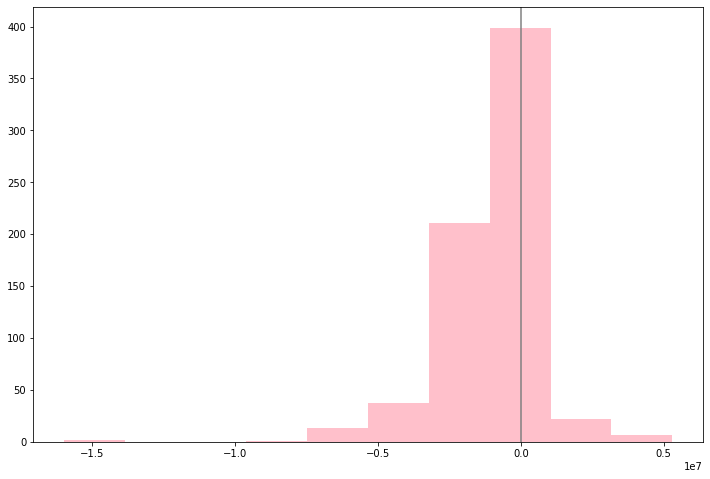

In [187]:
plt.figure(figsize = (12, 8))
plt.hist(df2.res, color = 'pink')
plt.axvline(x=0, color= 'grey')

In [190]:
df2.head(5)

,id_x,zip,address,price_usd,size_sf,no_stories,property_type,year_built,parking_ratio,no_units,...,cap_rate,gross_rent_multiplier,id_y,city,state_id,state_name,density,county_name,pre,res
2575,104507.0,90025,"1303 Wellesley Ave, Los Angeles, CA 90025 - Mu...",23500000.0,37000.0,5.0,Multifamily,2012.0,1.30,25.0,...,3.74,17.39,30026,Los Angeles,CA,California,7045.4,Los Angeles,7500000.0,-16000000.0
2089,175538.0,90046,"1267 N Laurel Ave, West Hollywood, CA 90046 - ...",21500000.0,18252.0,2.0,Multifamily,1958.0,1.31,22.0,...,4.20,16.01,30046,Los Angeles,CA,California,3397.6,Los Angeles,7500000.0,-14000000.0
106,164344.0,90057,"450 S Benton Way, Los Angeles, CA 90057 - Mult...",10600000.0,31845.0,4.0,Multifamily,1924.0,0.47,18.0,...,4.30,12.00,30051,Los Angeles,CA,California,21865.0,Los Angeles,2900000.0,-7700000.0
3961,177194.0,91403,"4617 Willis Ave, Sherman Oaks, CA 91403 - The ...",14250000.0,41756.0,2.0,Multifamily,1964.0,1.27,38.0,...,3.49,15.40,30244,Sherman Oaks,CA,California,2675.0,Los Angeles,7500000.0,-6750000.0
2269,104243.0,90210,"455 N Doheny Dr, Beverly Hills, CA 90210 - Mul...",7500000.0,8812.0,2.0,Multifamily,1931.0,0.68,16.0,...,3.04,18.81,30072,Beverly Hills,CA,California,736.5,Los Angeles,1395000.0,-6105000.0
